# Um projeto de *machine learning*

**Objetivos:**

- Aprender sobre o processo CRISP-DM;
- Aplicar o CRISP-DM a um projeto real de *machine learning*;
- Praticar análise exploratória;
- Construir *pipelines* de processamento de dados em scikit-learn;
- Entender o processo de construção, escolha e avaliação de modelos de *machine learning*;

## O processo CRISP-DM

CRISP-DM: CRoss-Industry Standard Process for Data Mining

***Atividade***: Leia o artigo "The CRISP-DM Model: The New Blueprint for Data Mining" (arquivo [`crisp-dm.pdf`](../resources/crisp-dm.pdf)) e responda:

1. O CRISP-DM é um processo de gerenciamento de equipes ou de estruturação de projetos?

---

CRISP-DM é um método de estruturação de projetos de "Data Mining", um nome antigo para o que hoje chamamos geralmente de "Ciência dos Dados". O método CRISP-DM especifica quais atividades devem acontecer em um projeto típico de ciência dos dados, sem especificar como a equipe de trabalho deve se organizar - e.g. SCRUM.

---


2. Construa uma explicação do ciclo do CRISP-DM conforme visto na figura abaixo. Preste atenção especial para o fato de que temos setas bidirecionais entre "Business Understanding" e "Data Understanding", e entre "Data Preparation" e "Modeling" - porque os autores se deram ao trabalho de fazer isso?

![CRISP-DM diagram](../resources/crisp-dm.png)

Fonte: Kenneth Jensen, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons. https://commons.wikimedia.org/wiki/File:CRISP-DM_Process_Diagram.png

---

Podemos observar alguns elementos sugestivos na figura acima:

- No centro da figura temos uma imagem representando a base de dados. Isto indica a proeminência dos dados - sua disponibilidade, seu entendimento, questões éticas e de segurança, etc - em todas as fases do projeto de *data science*.

- Na região externa da figura temos um grande círculo indicando:

    - A direção do fluxo do projeto;

    - O fato de que um projeto de ciência dos dados é feito de modo iterativo, onde as lições aprendidas em um ciclo do projeto são incorporadas à próxima iteração. Desta forma, existe um aperfeiçoamento contínuo do projeto, e mesmo uma reavaliação periódica de seus objetivos. Tal filosofia de desenvolvimento de projetos se assemelha ao desenvolvimento ágil de software, onde reconhece-se primordialmente que projetos desta natureza (seja desenvolvimento de software ou ciência dos dados) possuem uma grande incerteza inicial em relação aos objetivos e ao potencial do projeto, e que portanto a construção de valor tem que ser progressiva.

- Na região intermediária da figura existe um diagrama de blocos que representa a sequência de etapas do ciclo de projeto, com destaque para três fases:

    - A interação $\text{"Business Understanding"} \rightleftarrows \text{"Data Understanding"}$: Indica a importância da construção de conhecimento compartilhado entre profissionais complementares:

        - O especialista de negócios: entende o contexto do problema à qual o projeto se destina, e auxilia na concepção de objetivos que agregam valor ao negócio. Transfere conhecimento de contexto do problema e da natureza da origem dos dados ao especialista de dados. Ajusta seu próprio entendimento do potencial do projeto ao receber do especialista de dados mais conhecimento sobre a real informação contida nos dados, suas limitações e potenciais;

        - O especialista de dados: Tal qual um arquiteto que traduz os desejos do cliente em algo factível frente às limitações do mundo real, o especialista de dados explora os dados junto com o especialista de negócios para construir um entendimento conjunto destes dados, e do que se pode obter destes (insights, modelagem preditiva, etc)

        Nesta fase constrói-se o conjunto de objetivos do ciclo atual de desenvolvimento.

    - A interação $\text{"Data preparation"} \rightleftarrows \text{"Modeling"}$: 
    
        Preparação e modelagem de dados não são atividades estanques. Cada modelo requer uma preparação diferente, e a gama de modelos existentes é muito grande. Ademais, ao experimentar com o uso de um modelo pode-se descobrir que pode ser vantajoso processar os dados de maneira diferente, para um mesmo modelo. Esta manipulação de processamento e modelagem é um processo criativo, porém sujeito à rigorosa avaliação. Realizam-se iterações nesta fase até que um desempenho satisfatório seja atingido - ou que se estabeleça que talvez um desempenho satisfatório não seja possível, e que a fase de "Evaluation" a seguir deverá provavelmente enviar o fluxo de projeto para o ponto de partida.

        Nesta fase escolhe-se a melhor combinação pré-processamento/modelagem para o conjunto de dados de <span style="color:red;font-weight:bold">TREINO</style>.

    - O ponto de decisão "Evaluate" e os fluxos resultantes:

        Neste ponto devemos tomar a pipeline de processamento e modelagem advinda do processo anterior e avaliar seu desempenho em um conjunto de dados de <span style="color:red;font-weight:bold">TESTE</style>.

        Se o desempenho de <span style="color:red;font-weight:bold>teste</span> for satisfatório podemos seguir para a fase "Deployment". Nesta fase iremos produzir um artefato deste ciclo de trabalho que traga valor para o negócio, similar ao "minimum-viable-product" do desenvolvimento ágil. Este artefato pode ser um relatório com insights e lições aprendidas neste ciclo de análise dos dados, um novo conjunto de código e de parâmetros de modelo a ser utilizado em uma aplicação (e.g. em um microsserviço de predição que faz parte de um produto online da empresa), etc.

        Se o desempenho de <span style="color:red;font-weight:bold">teste</span> não for satisfatório, devemos tomar as lições aprendidas e retornar ao sub-ciclo $\text{"Business Understanding"} \rightleftarrows \text{"Data Understanding"}$ e levar esse novo conhecimento em consideração para melhorar o entendimento global do problema e recomeçar a modelagem com maiores chances de sucesso.

Após o "Deployment" em um ciclo bem-sucedido de projeto, devemos decidir se o projeto chegou a um estado final (seja um estado satisfatório ou porque houve uma decisão executiva de parar o projeto). Caso o projeto ainda deva continuar, iniciamos um novo ciclo.

---

3. Segundo o artigo, qual a porcentagem do tempo que se gasta, tipicamente, em cada uma das fases?

No artigo, página 15, segunda coluna, segundo parágrafo, lê-se:

> Generally accepted industry timeline standards are: $50$ to $70$
> percent of the time and effort in a data mining project involves
> the Data Preparation Phase; $20$ to $30$ percent involves the Data
> Understanding Phase; only $10$ to $20$ percent is spent in each of
> the Modeling, Evaluation, and Business Understanding Phases;
> and $5$ to $10$ percent is spent in the Deployment Planning Phase.

Essas frações não somam 100% porque existe sobreposição entre as fases:

- "Business Understanding" e "Data Understanding": duração total de $20\%$ a $30\%$
- "Data Preparation" e "Modeling": duração total de $50\%$ a $70\%$
- "Evaluation" e "Deployment": $10\%$ a $20\%$

Somando-se as durações médias das fases temos $25\% + 60\% + 15\%$ totalizando $100\%$.

## *California Housing*

Vamos trabalhar com um *dataset* de imóveis residenciais da Califórnia nos anos 1990.

### Obtendo os dados

In [1]:
from pathlib import Path

DATA_DIR = Path.cwd().parents[1] / 'datasets' / 'housing'
print(f'Saving data to {DATA_DIR}')

Saving data to /home/fjayres/dev/ml_labs/labs/datasets/housing


In [2]:
import tarfile
from urllib import request


def fetch_housing_data(data_dir: Path) -> None:
    '''Downloads the California Housing Prices dataset.

    Downloads the California Housing Prices dataset from Aurelien Geron's
    GitHub repository and saves it to the specified directory.

    Args:
        data_dir: The directory to which the dataset will be saved.

    Returns:
        None
    '''
    if not data_dir.exists():
        data_dir.mkdir(parents=True)

    # Fetch the housing data.
    HOUSING_URL = ('https://raw.githubusercontent.com/ageron/handson-ml2/'
                   'master/datasets/housing/housing.tgz')
    tgz_path = data_dir / 'housing.tgz'
    request.urlretrieve(HOUSING_URL, tgz_path)

    # Extract the housing data.
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=data_dir, filter='data')

In [3]:
fetch_housing_data(DATA_DIR)

In [4]:
import pandas as pd


def load_housing_data(data_dir: Path) -> pd.DataFrame:
    '''Loads the California Housing Prices dataset.

    Loads the California Housing Prices dataset from the specified directory.

    Args:
        data_dir: The directory from which the dataset will be loaded.

    Returns:
        A pandas DataFrame containing the California Housing Prices dataset.
    '''
    csv_path = data_dir / 'housing.csv'
    df = pd.read_csv(csv_path)
    return df

In [5]:
data = load_housing_data(DATA_DIR)

print(f'O dataset tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
print('As colunas são:')
for column_name in data.columns:
    print(f'- "{column_name}"')


O dataset tem 20640 linhas e 10 colunas.
As colunas são:
- "longitude"
- "latitude"
- "housing_median_age"
- "total_rooms"
- "total_bedrooms"
- "population"
- "households"
- "median_income"
- "median_house_value"
- "ocean_proximity"


### Entendimento do negócio

Esses dados representam informações censitárias acerca de *distritos* residenciais no estado da California na década de 1990.

Atividade: Baseado nos nomes das colunas, você conseguiria escrever o significado de cada coluna?

Resposta: não muito bem.

Consultando o livro-texto da disciplina, capítulo 2, aprendemos que esses dados se referem aos distritos (conforme escrito no enunciado) e, portanto, são um pouco estranhos. Provavelmente significam, para cada distrito, o seguinte:

- `longitude`: a longitude do centro;
- `latitude`: a latitude do centro;
- `housing_median_age`: a idade mediana dos imóveis;
- `total_rooms`: essa é estranha, é a quantidade **total** de cômodos no distrito. Ou seja, a soma do número de cômodos de todos os imóveis;
- `total_bedrooms`: a soma do número de *quartos* de todos os imóveis;
- `population`: quantas pessoas moram no distrito;
- `households`: número de imóveis;
- `median_income`: renda mediana dos moradores do distrito;
- `median_house_value`: o valor mediano dos imóveis do distrito. Esta é a nossa variável a ser predita;
- `ocean_proximity`: só pelo nome é difícil saber a natureza exata desta variável. Trata-se de uma variável *categórica* indicando o "status" do distrito em relação à sua proximidade com o oceano Pacífico.

Atividade: Escreva o objetivo de negócios deste projeto

Nosso objetivo é prever o valor mediano dos imóveis de um distrito residencial da Califórnia, baseado em uma série de atributos deste conforme visto acima.

### Análise exploratória

O objetivo da análise exploratória é "conhecer" os dados:

- Qual a distribuição de cada *feature*?

- Qual a natureza de cada *feature*?

    - Unidade de medida

    - Se é estritamente positiva ou se pode ser positiva ou negativa

    - Para que serve?

- Quais e como são as distribuições conjuntas de *features*? Em particular, como as *features* se relacionam com o *target*?

- Existem anomalias e erros?

    - Dados faltantes

    - "Saturação" de dados

    - Outliers

    - Desbalanceamento de classes

    - Dados duplicados

#### Análise exploratória: antes ou depois da separação treino-teste?

Durante o processo de modelagem vamos dividir os dados em dois conjuntos: "dados de treino" e "dados de teste". Devemos treinar nossos modelos com o conjunto de dados de treino, e avaliar seu desempenho no conjunto de teste, para que não nos enganemos com desempenhos preditivos excelentes no conjunto de treino e que não se reproduzem no conjunto de teste!

Atividade: Como se chama o fenômeno no qual temos um excelente desempenho no conjunto de treino e um desempenho bem menor no conjunto de teste?

<center>
<span style="color:red;font-family:Papyrus;font-weight:bold;font-size:30px">
    OVERFITTING!
</span>
<span style="color:darkgray;font-size:10px">
    booooooo!
</span>
</center>

Quando devemos fazer a análise exploratória?

- Antes da separação treino-teste, ou seja, no conjunto de dados completo?

- Depois da separação treino-teste, ou seja, usando apenas o conjunto de dados de treino?

Esta é uma pergunta difícil de responder.

- Analisar antes da separação:

    - Vantagens: todo o conjunto de dados de exemplo que foi coletado está á nossa disposição para estudo, o que torna mais fácil a detecção de anomalias raras, como outliers ou a ocorrência de categorias raras em *features* categóricas.

    - Desvantagens: corremos o risco de "data snooping" ("bisbilhotar" os dados), onde acabamos por aprender algo sobre os dados que pode impactar de modo "injusto" nossa modelagem - é como se estivéssemos "overfittando" sem querer!

- Analisar depois da separação:

    - Vantagens: reduz o risco de "data snooping"

    - Desvantagens: podemos não perceber anomalias e erros raros nos dados, que podem impactar nossa modelagem de uma forma que é difícil de identificar.

O que fazer então? Em geral, queremos balancear o risco de "data snooping" com o risco de não entender os detalhes mais finos e raros dos dados. Portando a recomendação é fazer análises exploratórias antes e depois da separação, com objetivos diferentes:

- Análise exploratória antes da separação: faça apenas análises globais e simples, para checar a sanidade dos dados e realizar filtragens simples. Evite análises que conectem as *features* com o *target*.

- Análise exploratória depois da separação: você está livre para explorar o que quiser.

Vamos fazer uma primeira análise dos dados, apenas para checar a integridade destes.

In [6]:
data.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Atividade: Acompanhe o desenvolvimento da análise exploratória a ser feito pelo professor.

---

Nossa exploração terá três fases:

- Análise exploratória preliminar
- Separação treino-teste
- Análise exploratória complementar

É importante distinguir a análise exploratória realizada antes da separação de dados em conjuntos de treino e teste, daquela posterior a esta separação, para evitar o *"data snooping"* descrito acima.

#### Análise exploratória

Nesta fase vamos conhecer a natureza dos dados sem explorar suas interrelações, em especial não vamos explorar a conexão entre as *features* e o *target*.

Vamos proceder da seguinte forma:

<table>

<tr>
<th> Etapa </th>
<th> Objetivos </th>
<th> Ferramentas </th>
</tr>

<tr>

<td>
    Uma análise global do volume de dados
</td>

<td>
    <ul>
    <li> Quais são as <em>features</em>?</li>
    <li> Quem é o <em>target</em>?</li>
    <li> Quais variáveis são contínuas e quais são categóricas?</li>
    <li> Existem dados faltantes? </li>
    <li> Existem dados duplicados? </li>
    </ul>
</td>

<td>
    <div>
    <ul>
    <li> Número de linhas e colunas </li>
    <li> Tipo de dados de cada coluna </li>
    <li> Remoção de linhas duplicadas <em>se isso realmente for um erro</em> </li>
    </ul>
    </div>
</td>
</tr>

<tr>

<td>
    Uma primeira análise da natureza das features
</td>

<td>
    <ul>
    <li> Qual a unidade de medida de cada variável? </li>
    <li> Existem anomalias? 
        <ul>
            <li> <em>outliers</em> </li>
            <li> erros grosseiros </li>
            <li> <em>spikes</em> </li>
        </ul>
    </li>
    <li> Para cada variável contínua
        <ul>
            <li> Simétrica? </li>
            <li> Estritamente positiva/negativa? </li>
            <li> Unimodal / multimodal? </li>
            <li> Cauda longa à direita/esquerda? </li>
        </ul>
    </li>
    <li> Para cada variável categórica
        <ul>
            <li>Categorias raras?</li>
            <li>Categorias dominantes?</li>
        </ul>
    </li>
    </ul>
</td>

<td>
    <ul>
    <li>Medidas descritivas de posição e espalhamento</li>
    <li>Histogramas</li>
    <li>Tabelas de frequência</li>
    <li>Gráficos de barra</li>
    </ul>
</td>

</tr>

</table>

##### Análise global

Vamos conferir os tipos de dados espiando as primeiras linhas do *dataset*:

In [8]:
data.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


E vamos verificar quantos exemplos temos, e qual o tipo de dados identificado pelo Pandas para cada coluna:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As colunas do tipo `float64` são todas contínuas neste exemplo. Isso nem sempre é verdade: pode ser que tenhamos uma variável categórica que foi lida como `float64` por engano! Sempre verifique a natureza das suas variáveis.

Em teoria, não é estritamente correto dizer que essas variáveis `float64` são perfeitamente contínuas. Na verdade, a maioria delas é discreta, pois trata-se de contagens ou de idade inteira: `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`. A decisão de convertê-las para inteiros ou mantê-las como números reais é dependente de aplicação. Para nós, neste projeto, não vai fazer diferença.

A feature `ocean_proximity` é do tipo `object`, que é o tipo de dados que o Pandas associa a qualquer coisa que não seja um número.


Vamos registrar as descrições e unidades de medida de cada variável:

| Variável             | Unidade de medida  | Descrição                                         |
|----------------------|--------------------|---------------------------------------------------|
| `longitude`          | graus              | a longitude do centro                             |
| `latitude`           | graus              | a latitude do centro                              |
| `housing_median_age` | anos               | a idade mediana dos imóveis                       |
| `total_rooms`        | n/a - contagem     | soma do número de cômodos de todos os imóveis     |
| `total_bedrooms`     | n/a - contagem     | a soma do número de *quartos* de todos os imóveis |
| `population`         | n/a - contagem     | quantas pessoas moram no distrito                 |
| `households`         | n/a - contagem     | número de imóveis                                 |
| `median_income`      | US$ $\times 10000$ | renda mediana dos moradores do distrito           |
| `median_house_value` | US$                | o valor mediano dos imóveis do distrito           |
| `ocean_proximity`    | n/a - categoria    | categoria de proximidade com o oceano Pacífico    |

As informações aqui foram obtidas do livro-texto da disciplina, capítulo 2, que está servindo de "Business Expert" para a gente.

In [10]:
data_no_dups = data.drop_duplicates()

In [11]:
data_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


O *dataset* sem linhas duplicadas tem o mesmo tamanho do *dataset* original, indicando que não existiam linhas duplicadas de qualquer forma.

##### Análise preliminar das features

Vamos verificar as medidas descritivas de cada feature, a começar pelas variáveis contínuas:

In [12]:
data.select_dtypes(include='number').describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Quando a tabela fica muito longa horizontalmente e curta verticalmente, tente "transpor" a tabela para ver se fica melhor:

In [13]:
data.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Melhorou. Agora limite o número de casas decimais para ficar mais fácil ainda de observar.

In [14]:
data.select_dtypes(include='number').describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,20640.0,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
total_bedrooms,20433.0,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
households,20640.0,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
median_income,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,20640.0,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00


Observamos o seguinte:

- Todas as colunas possuem $20640$ itens não-nulos ("count"), exceto pela coluna `total_bedrooms` que tem valores faltantes. Vamos discutir medidas para lidar com isso em breve.

- Latitude e Longitude ficam em torno de $-120\degree$ e $36\degree$, correspondendo à localização geral da Califórnia.

<center>
<img 
    src="../resources/california_location.png"
    alt="Snapshot of California showing latitude and longitude"
    width="400"
/>
</center>

- Fora latitude e longitude, as features são todas estritamente positivas, tem valor mínimo teórico de zero, e tem uma variabilidade muito alta! Podemos analisar a magnitude da variabilidade de cada feature em relação à sua própria média, obtendo desta forma um valor normalizado de variação chamado *coeficiente de variação*.

In [15]:
def compute_coefficient_of_variation(data: pd.DataFrame) -> pd.Series:
    '''Computes the coefficient of variation for each column in a DataFrame.

    Args:
        data: A pandas DataFrame.

    Returns:
        A pandas Series containing the coefficient of variation for each column
        in the input DataFrame.
    '''
    stats = data \
        .select_dtypes(include='number') \
        .describe() \
        .transpose() \
        .drop(['longitude', 'latitude'], axis=0)
    CV = stats['std'] / stats['mean']
    CV.rename('Coefficient of Variation', inplace=True)
    return CV


print(compute_coefficient_of_variation(data).round(2).to_markdown())

|                    |   Coefficient of Variation |
|:-------------------|---------------------------:|
| housing_median_age |                       0.44 |
| total_rooms        |                       0.83 |
| total_bedrooms     |                       0.78 |
| population         |                       0.79 |
| households         |                       0.77 |
| median_income      |                       0.49 |
| median_house_value |                       0.56 |


| Feature            |   Coefficient of Variation |
|:-------------------|---------------------------:|
| housing_median_age |                       0.44 |
| total_rooms        |                       0.83 |
| total_bedrooms     |                       0.78 |
| population         |                       0.79 |
| households         |                       0.77 |
| median_income      |                       0.49 |
| median_house_value |                       0.56 |

Podemos observar que as medidas de desvio padrão, quando normalizadas pelo valor da média (ou seja, o coeficiente de variação), são valores entre $44\%$ e $83\%$, indicando que existe muita diferença entre os distritos da Califórnia em todos esses atributos. 

E daí? Bem, esta observação pode indicar alternativas de modelagem dos dados. Talvez existam classes intrínsecas de distritos californianos, e que modelar essa possível *variável latente* pode ser útil para melhorar o desempenho do modelo. Talvez tenhamos *outliers* e cauda longa, que estão enviesando o cálculo do desvio padrão. De qualquer modo, indica que devemos prestar mais atenção na distribuição dos dados.

Vamos então estudar a distribuição de cada variável com histogramas:

In [16]:
import numpy as np

# Regra prática: número de bins = sqrt(número de amostras)
n_bins = np.floor(np.sqrt(data.shape[0])).astype(int).item()

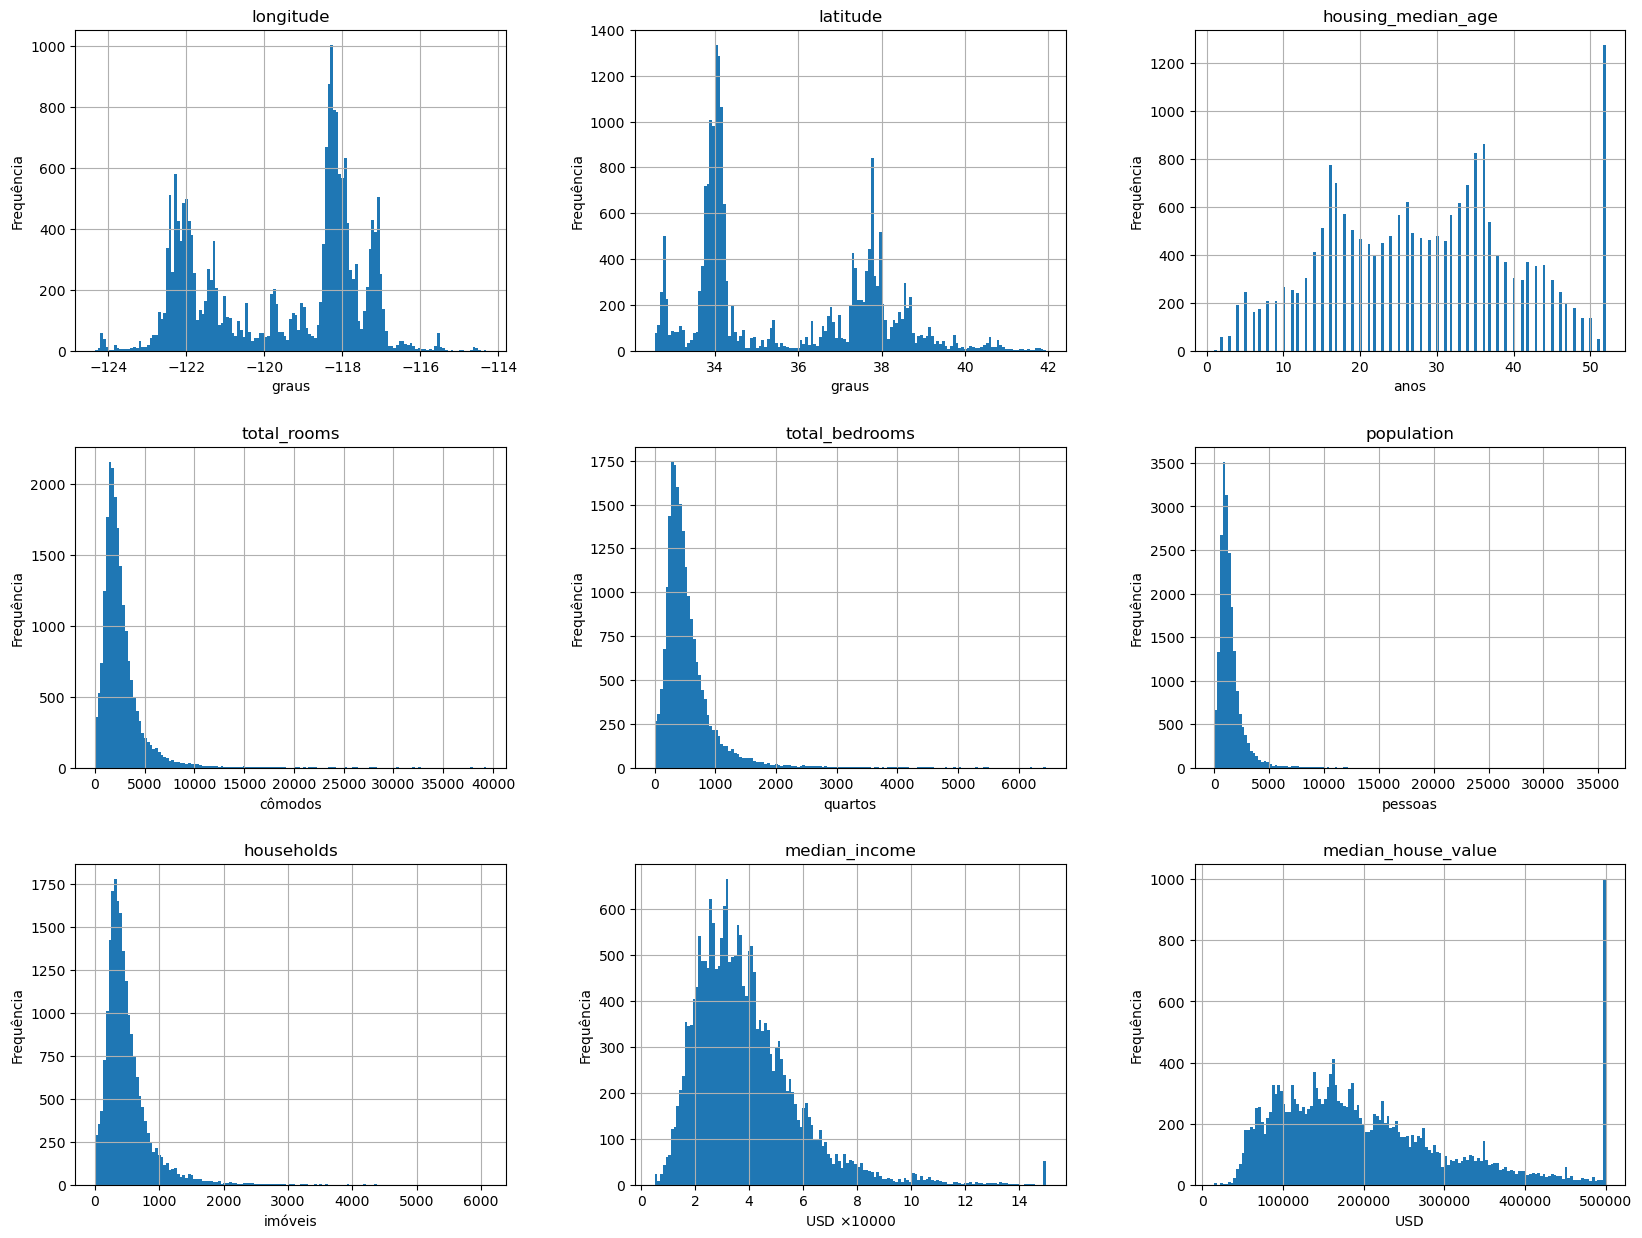

In [17]:
import matplotlib.pyplot as plt

measurement_units = {
    'longitude': 'graus',
    'latitude': 'graus',
    'housing_median_age': 'anos',
    'total_rooms': 'cômodos',
    'total_bedrooms': 'quartos',
    'population': 'pessoas',
    'households': 'imóveis',
    'median_income': r'USD $\times 10000$',
    'median_house_value': r'USD',
    'ocean_proximity': 'classe',
}

result = data.select_dtypes(include='number').hist(bins=n_bins,
                                                   figsize=(20, 15))
for subplot in result.flatten():
    column = subplot.get_title()
    unit = measurement_units[column]
    subplot.set_xlabel(unit)
    subplot.set_ylabel('Frequência')
plt.show()

In [18]:
result[0][0].get_title()

'longitude'

Observamos o seguinte:

**Latitude e longitude**

Estão flutuando de um jeito dificil de entender. Mas isso é esperado - basta plotar os dados e compará-los á um mapa da California:

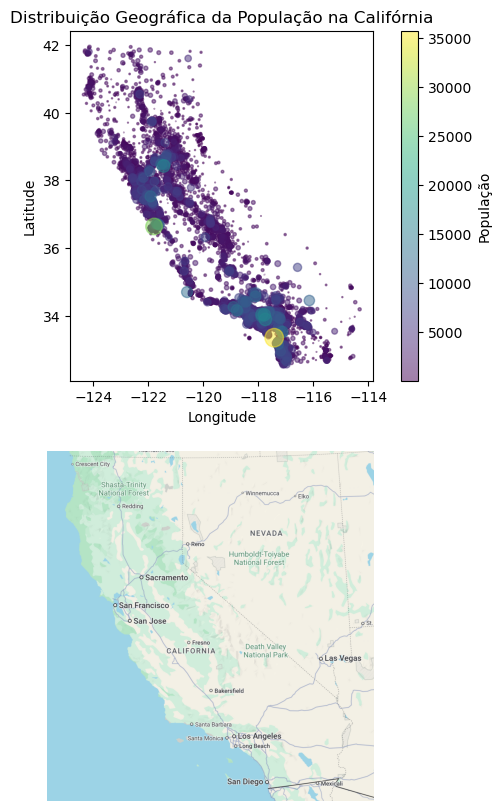

In [19]:
def plot_geo_pop():
    '''Plots the geographical distribution of the population in California.'''
    # Ordena os dados por população. É um truque para evitar que pontos
    # sobrepostos ocultem outros pontos. Assim, os pontos com populações
    # maiores são plotados por último.
    sorted_data = data.sort_values(by='population', ascending=True)

    longitude = sorted_data['longitude']
    latitude = sorted_data['latitude']
    population = sorted_data['population']

    # Ajusta a razão de aspecto para compensar a distorção da projeção.
    aspect_ratio = 1 / np.cos(np.mean(latitude) * np.pi / 180)

    img = plt.imread(Path.cwd().parent / 'resources' / 'california.png')

    plt.figure(figsize=(7, 10))

    plt.subplot(2, 1, 1)
    plt.scatter(
        longitude,
        latitude,
        alpha=0.5,
        s=population / 200,
        c=population,
        cmap='viridis',
    )
    plt.colorbar(label='População')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.gca().set_aspect(aspect_ratio)
    plt.title('Distribuição Geográfica da População na Califórnia')

    plt.subplot(2, 1, 2)
    plt.imshow(img)
    plt.axis('off')

    plt.show()


plot_geo_pop()

Aparentemente a população californiana se distribui heterogeneamente, como se espera de qualquer população.

***Spikes***

As colunas `house_median_age`, `median_house_value` e `median_income` possuem **spikes** em seus histogramas: barras finas e proeminentes no gráfico. Isso indica um excesso de elementos no *dataset* que apresentam o valor do *spike*, e requer investigação quanto á suas causas.



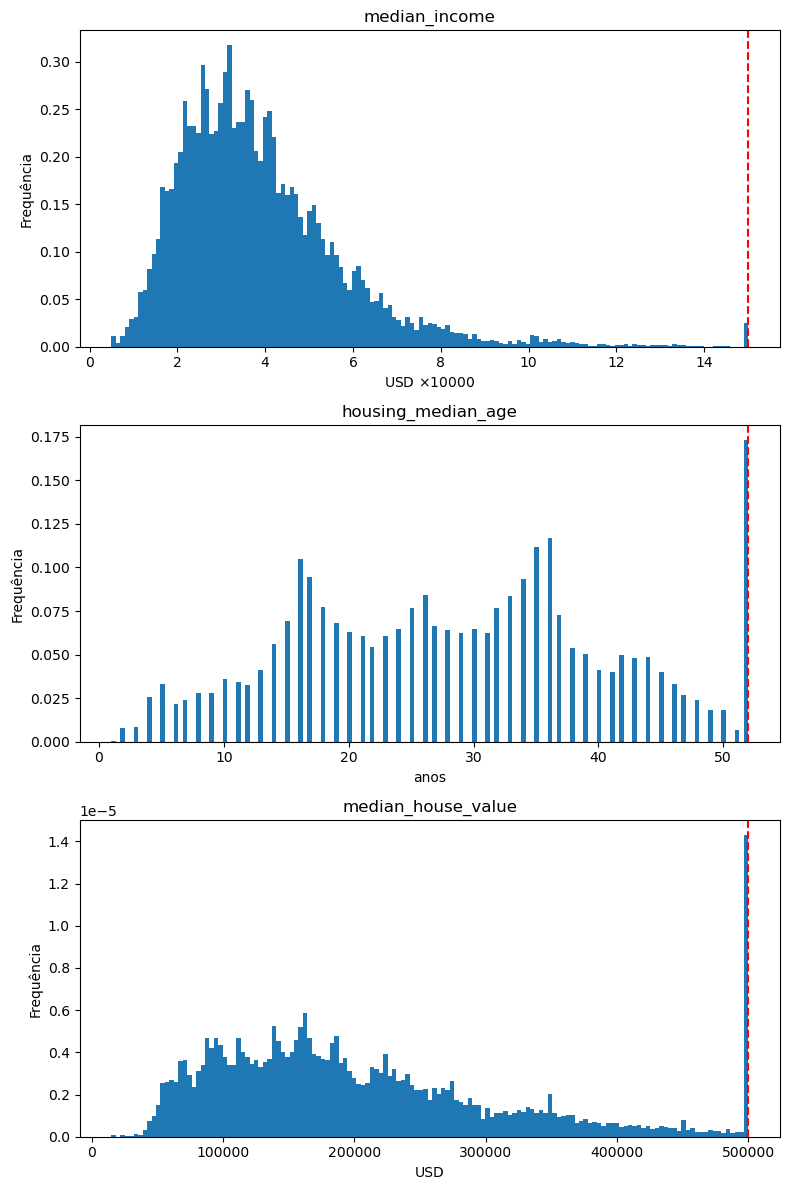

In [20]:
columns = [
    'median_income',
    'housing_median_age',
    'median_house_value',
]

spike_locations = {
    'median_income': 15,
    'housing_median_age': 52,
    'median_house_value': 500001,
}

fig, axes = plt.subplots(3, 1)
fig.set_size_inches(8, 12)
for ax, column in zip(axes, columns):
    ax.hist(data[column], bins=n_bins, density=True)
    ax.axvline(spike_locations[column], color='red', linestyle='--')

    ax.set_xlabel(measurement_units[column])
    ax.set_ylabel('Frequência')
    ax.set_title(column)
fig.tight_layout()
plt.show()

Neste caso, como os *spikes* estão localizados no extremo direito do histograma, provavelmente são devidos a um efeito de *saturação*. Por exemplo, pode ter sido o caso que a variável `median_house_value` registrou todos os preços de imóveis corretamente, exceto para imóveis que valiam mais do que USD $500$ mil - situação na qual o valor registrado é simplesmente $500001$.

O que fazer nesse caso? Posto que trata-se de dados inválidos, o melhor pode ser simplesmente ignorar esses exemplos - ou seja, removê-los do dataset.

**Colunas positivas com cauda à direita**

As colunas `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income` e `median_house_value` apresentam um comportamento comum:

- São quantidades estritamente positivas;
- Possuem cauda longa à direita.

Nestes casos, pode ser interessante aplicar uma transformação do tipo "logaritmo" aos dados. Vejamos como fica:

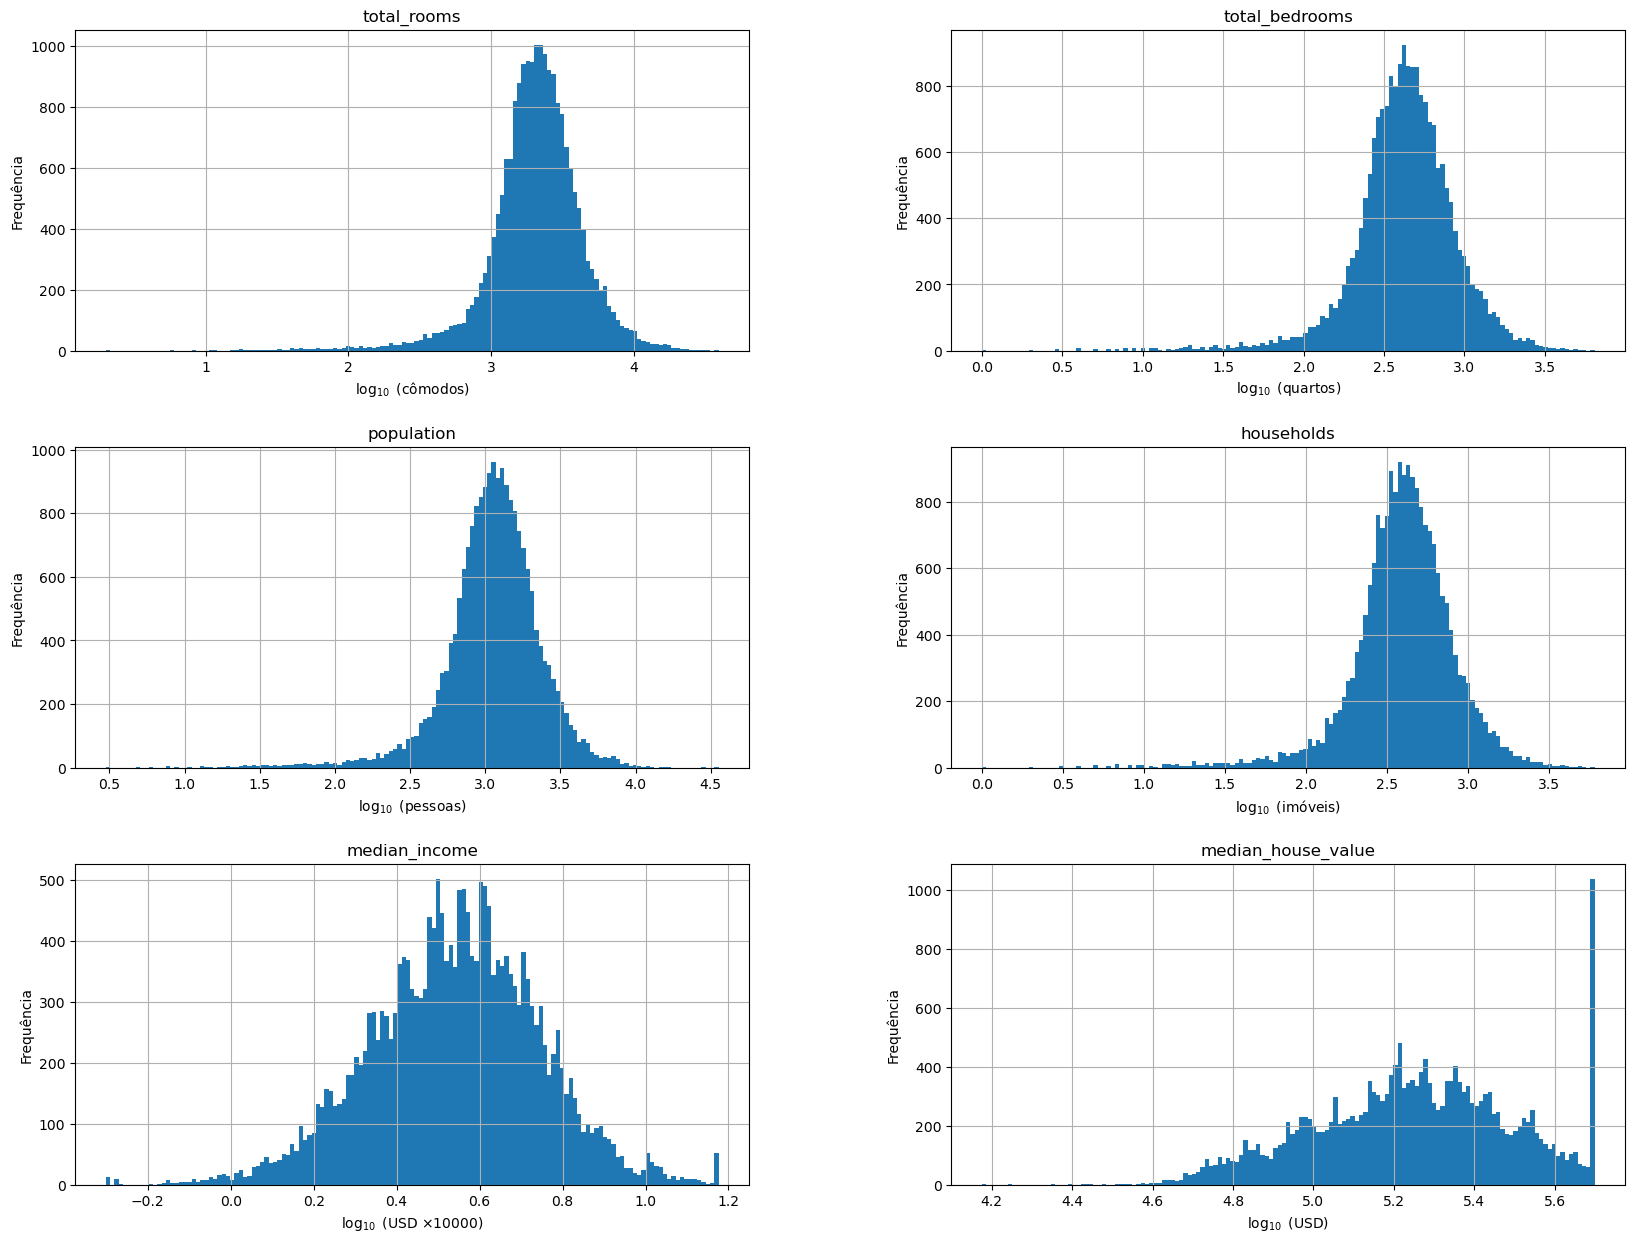

In [21]:
columns = [
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
]

results = data[columns] \
    .map(np.log10) \
    .hist(bins=n_bins, figsize=(20, 15))

for subplot in results.flatten():
    column = subplot.get_title()
    unit = measurement_units[column]
    subplot.set_xlabel('$\\log_{10}$ ' + f'({unit})')
    subplot.set_ylabel('Frequência')

plt.show()

É interessante notar que os dados, após uma transformação logarítmica, passam a ter uma característica mais simétrica, e sem *outliers*! Isso pode ser muito benéfico para alguns tipos de modelos, em especial o *modelo linear* que veremos em breve.

Vamos agora analisar a única *feature* categórica:

**`ocean_proximity`**

In [22]:
counts = data['ocean_proximity'].value_counts()

counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

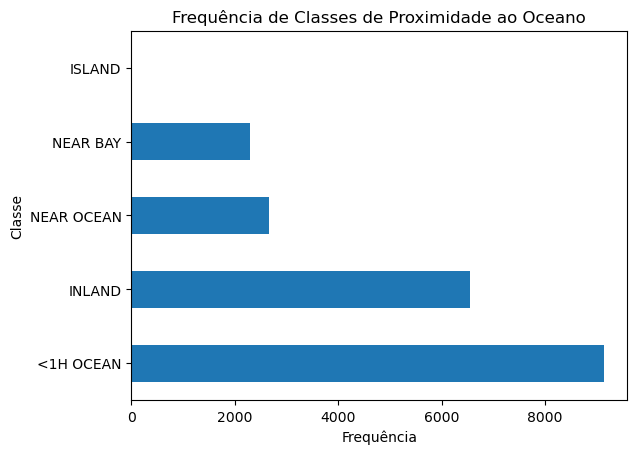

In [23]:
counts.plot.barh()
plt.xlabel('Frequência')
plt.ylabel('Classe')
plt.title('Frequência de Classes de Proximidade ao Oceano')
plt.show()


Temos uma classe com pouquíssima representação: `ISLAND`. Temos que decidir o que fazer: remover esses casos ou não? Para simplificar a análise, vamos remover esses casos.

### Filtragem

Atividade: Baseado no que aprendemos na análise exploratória, escreva um código para filtrar o *dataset*. Não modifique as colunas, apenas aceite ou rejeite cada linha de dados.

In [24]:
def get_valid_rows(data: pd.DataFrame) -> pd.Series:
    '''Returns a boolean Series indicating which rows of a DataFrame are valid.

    Args:
        data: A pandas DataFrame.

    Returns:
        A boolean Series indicating which rows of the input DataFrame are valid.
    '''
    # Remove rows with spikes.
    valid_rows = ((data['median_income'] < 15) &
                  (data['housing_median_age'] < 52) &
                  (data['median_house_value'] < 500001))

    # Remove rows with ocean_proximity == 'ISLAND'.
    valid_rows &= data['ocean_proximity'] != 'ISLAND'

    return valid_rows


def filter_data(data: pd.DataFrame) -> pd.DataFrame:
    '''Filters a DataFrame to remove invalid rows.

    Args:
        data: A pandas DataFrame.

    Returns:
        A pandas DataFrame with invalid rows removed.
    '''
    valid_rows = get_valid_rows(data)
    return data[valid_rows]


filtered_data = filter_data(data)

In [25]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18568 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18568 non-null  float64
 1   latitude            18568 non-null  float64
 2   housing_median_age  18568 non-null  float64
 3   total_rooms         18568 non-null  float64
 4   total_bedrooms      18375 non-null  float64
 5   population          18568 non-null  float64
 6   households          18568 non-null  float64
 7   median_income       18568 non-null  float64
 8   median_house_value  18568 non-null  float64
 9   ocean_proximity     18568 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Salve o resultado do processamento na forma de um arquivo "Parquet": https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_parquet.html

In [26]:
filtered_data.to_parquet(DATA_DIR / 'filtered_housing.parquet')

## Separação treino-teste

Antes de prosseguir com nossa análise exploratória, é melhor realizar a *separação treino-teste*, na qual vamos reservar uma porção dos nossos dados de exemplo para *treinar* nossos modelos, e outra parcela para *testar* o modelo escolhido e ter uma melhor noção acerca do real desempenho deste. 

Por que avaliar em um conjunto de dados diferente daquele de treino? Bem, em primeiro lugar, devemos lembrar que ambos os conjuntos de dados (treino e teste) vieram do mesmo conjunto de exemplos, e portanto são amostras da mesma população. Logo, ao avaliar o desempenho do modelo escolhido em um conjunto de teste, estamos verificando o comportamento estimado do modelo na população em geral.

Mas o conjunto de treino também veio da população, por que ele não serve para fazer uma avaliação de desempenho final? Por causa do 

<center>
<span style="color:red;font-family:Papyrus;font-weight:bold;font-size:30px">
    OVERFITTING!
</span>
<span style="color:darkgray;font-size:10px">
    booooooo!
</span>
</center>

Pode ser que seu modelo tenha se ajustado a características irrelevantes dos dados ("ruído") ao invés de se concentrar no comportamento mais provável dos seus dados.

Em termos semi-matemáticos, a idéia é a seguinte:

- Seus dados observados são uma mistura de dados "reais" DETERMINÍSTICOS (entra um certo "$x$", sai sempre o mesmo "y") e ruído ALEATÓRIO (cada vez que mede dá diferente);

- Para a parte determinística, estamos supondo que *realmente* existe uma parte $y = f(x)$ nesse experimento;

<center><img src="../resources/y_sinal.png" width=600/></center>

- Para a parte aleatória, estamos supondo que trata-se de valores obtidos de uma distribuição de média zero, e que são independentes entre observações.

<center><img src="../resources/y_ruido.png" width=600/></center>

- Os valores observados são, portanto, uma combinação do valor "real" (que só a fada dos sinais conhece) e do "ruído" (também, só de conhecimento do coelhinho da Páscoa dos ruídos), gerando o valor observado por nós.

<center><img src="../resources/y_observado.png" width=600/></center>

- Entre duas amostras separadas de observações da população (o "conjunto de treino" e o "conjunto de teste") temos a repetição do comportamento da parte DETERMINÍSTICA, no sentido de que a regra de geração de valores $y$ a partir de $x$ (ou seja, a componente "escondida" $y = f(x)$ está firme e forte), e a parte ALEATÓRIA é a imprevisível.

<center><img src="../resources/y_treino_teste.png" width=600/></center>

Ao treinar com

<center>
<span style="color:red;font-family:Papyrus;font-weight:bold;font-size:30px">
    OVERFITTING!
</span>
<span style="color:darkgray;font-size:10px">
    booooooo!
</span>
</center>

a gente acaba aprendendo um $y = g(x)$ onde $g(x)$ incorpora o $f(x)$ (alegria!) e também um extra ali que é só o ruido OBSERVADO NAQUELE CONJUNTO DE TREINO ESPECÌFICO! O modelo não sabe disso, tudo que ele observa é o conjunto de treino, sem saber o que é que daquilo ali é ruido!

<center><img src="../resources/erro_overfitting.png" width=600/></center>



In [27]:
filtered_data = pd.read_parquet(DATA_DIR / 'filtered_housing.parquet')

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    filtered_data,
    test_size=0.2,
    random_state=42,
)

In [29]:
train_data.to_parquet(DATA_DIR / 'train_housing.parquet')
test_data.to_parquet(DATA_DIR / 'test_housing.parquet')

Agora podemos prosseguir com a análise exploratória.

## Análise exploratória pós-separação treino-teste

In [30]:
def load_filtered_data(data_dir: Path) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''Loads the filtered California Housing Prices dataset.

    Loads the filtered California Housing Prices dataset from the specified
    directory and splits it into training and test sets.

    Args:
        data_dir: The directory from which the dataset will be loaded.

    Returns:
        A tuple containing the training and test sets.
    '''
    train_data = pd.read_parquet(data_dir / 'train_housing.parquet')
    test_data = pd.read_parquet(data_dir / 'test_housing.parquet')
    return train_data, test_data

In [31]:
train_data, test_data = load_filtered_data(DATA_DIR)

## Processamento dos dados e Pipelines

In [32]:
def split_features_target(
    train_data: pd.DataFrame, test_data: pd.DataFrame
) -> tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    '''Splits the features and target from the training and test sets.

    Args:
        train_data: The training set.
        test_data: The test set.

    Returns:
        A tuple containing the features and target for the training set, followed
        by the features and target for the test set.
    '''
    X_train = train_data.drop('median_house_value', axis=1).copy()
    y_train = train_data['median_house_value'].copy()

    X_test = test_data.drop('median_house_value', axis=1).copy()
    y_test = test_data['median_house_value'].copy()

    return X_train, y_train, X_test, y_test

In [33]:
X_train, y_train, X_test, y_test = split_features_target(train_data, test_data)

# Vamos usar o log10 do target.
y_train = np.log10(y_train)
y_test = np.log10(y_test)

In [34]:
numerical_cols = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
]

categorical_cols = [
    'ocean_proximity',
]

In [35]:
for i, c in enumerate(X_train.columns):
    print(i, c)


0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [36]:
from typing import Any, Self

from sklearn.base import BaseEstimator, TransformerMixin


class ComputeFeatures(BaseEstimator, TransformerMixin):
    '''Computes new features from the existing features.'''
    TOTAL_ROOMS_COLUMN = 3
    TOTAL_BEDROOMS_COLUMN = 4
    POPULATION_COLUMN = 5
    HOUSEHOLDS_COLUMN = 6

    def fit(self, X: np.array, y: Any = None) -> Self:
        return self

    def transform(self, X: np.array) -> np.array:
        rooms_per_household = \
            X[:, self.TOTAL_ROOMS_COLUMN] / X[:, self.HOUSEHOLDS_COLUMN]
        bedrooms_per_household = \
            X[:, self.TOTAL_BEDROOMS_COLUMN] / X[:, self.HOUSEHOLDS_COLUMN]
        bedrooms_per_room = \
            X[:, self.TOTAL_BEDROOMS_COLUMN] / X[:, self.TOTAL_ROOMS_COLUMN]
        population_per_household = \
            X[:, self.POPULATION_COLUMN] / X[:, self.HOUSEHOLDS_COLUMN]

        X = np.c_[
            X,
            rooms_per_household,
            bedrooms_per_household,
            bedrooms_per_room,
            population_per_household,
        ]
        return X

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [38]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('features', ComputeFeatures()),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder()),
])

In [39]:
from sklearn.compose import ColumnTransformer

preprocessing_pipe = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols),
],)

## Escolha de modelos

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = Pipeline([
    ('preprocessing', preprocessing_pipe),
    ('regression', LinearRegression()),
])

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = Pipeline([
    ('preprocessing', preprocessing_pipe),
    ('regression', DecisionTreeRegressor(random_state=42)),
])

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = Pipeline([
    ('preprocessing', preprocessing_pipe),
    ('regression', RandomForestRegressor(random_state=42)),
])

In [44]:
from sklearn.metrics import root_mean_squared_error
from sklearn.base import BaseEstimator


def train_and_evaluate_model(
    model: BaseEstimator,
    X_train: pd.DataFrame,
    y_train: np.array,
    X_val: pd.DataFrame,
    y_val: np.array,
) -> float:
    '''Trains and evaluates a model.

    Args:
        model: A scikit-learn model.
        X_train: The training features.
        y_train: The training target.
        X_val: The validation features.
        y_val: The validation target.

    Returns:
        The root mean squared error of the model on the validation set.
    '''
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return root_mean_squared_error(y_val, y_pred)


In [45]:
rmse_lin_reg = train_and_evaluate_model(lin_reg, X_train, y_train, X_val, y_val)
rmse_tree_reg = train_and_evaluate_model(tree_reg, X_train, y_train, X_val, y_val)
rmse_forest_reg = train_and_evaluate_model(forest_reg, X_train, y_train, X_val, y_val)

In [46]:
print(f'Linear Regression RMSE: {rmse_lin_reg:.4f}')
print(f'Decision Tree RMSE: {rmse_tree_reg:.4f}')
print(f'Random Forest RMSE: {rmse_forest_reg:.4f}')


Linear Regression RMSE: 0.1331
Decision Tree RMSE: 0.1379
Random Forest RMSE: 0.0976


In [47]:
percentage_error_lin_reg = 100.0 * (10.0 ** rmse_lin_reg - 1.0)
percentage_error_tree_reg = 100.0 * (10.0 ** rmse_tree_reg - 1.0)
percentage_error_forest_reg = 100.0 * (10.0 ** rmse_forest_reg - 1.0)

In [48]:
print(f'Linear Regression Percentage Error: {percentage_error_lin_reg:.2f}%')
print(f'Decision Tree Percentage Error: {percentage_error_tree_reg:.2f}%')
print(f'Random Forest Percentage Error: {percentage_error_forest_reg:.2f}%')


Linear Regression Percentage Error: 35.85%
Decision Tree Percentage Error: 37.37%
Random Forest Percentage Error: 25.21%


## Avaliação